In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv('/bin/Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()
print("\n\n\n NO missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



 NO missing values


In [ ]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
# Convert boolean columns to integers (1 and 0)
df['Gender']=df['Gender'].astype(int)

In [ ]:
#one hot encodig successfull as we can see in the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


## **Insights from the Data**

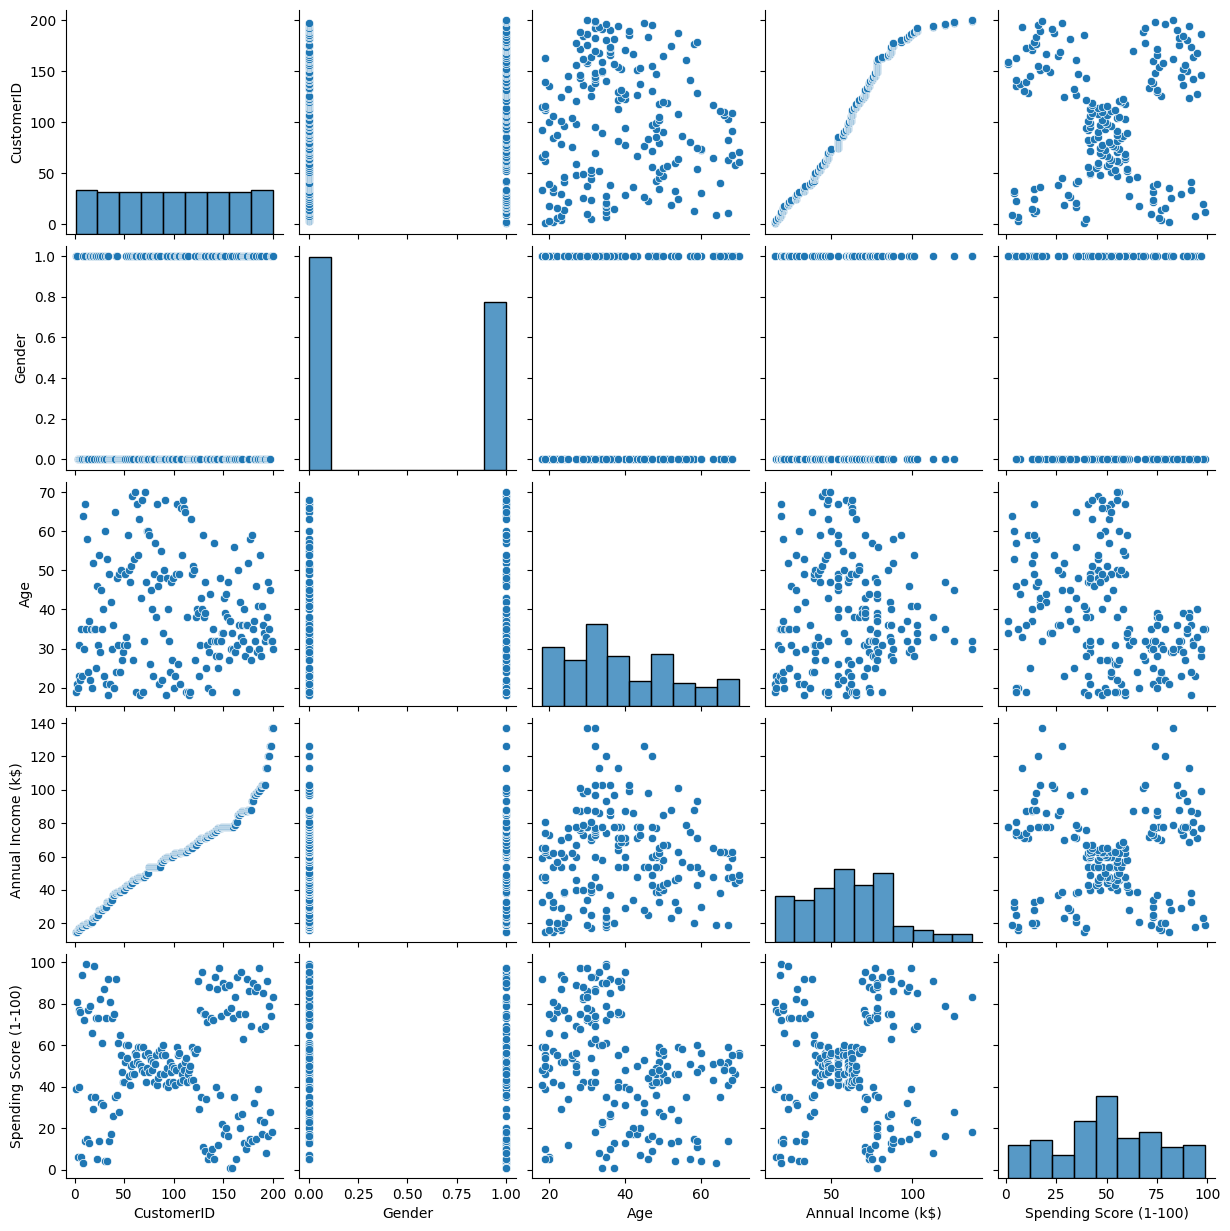

In [ ]:
#lets see the plots between different columns of the dataset
sns.pairplot(df)

<Axes: >

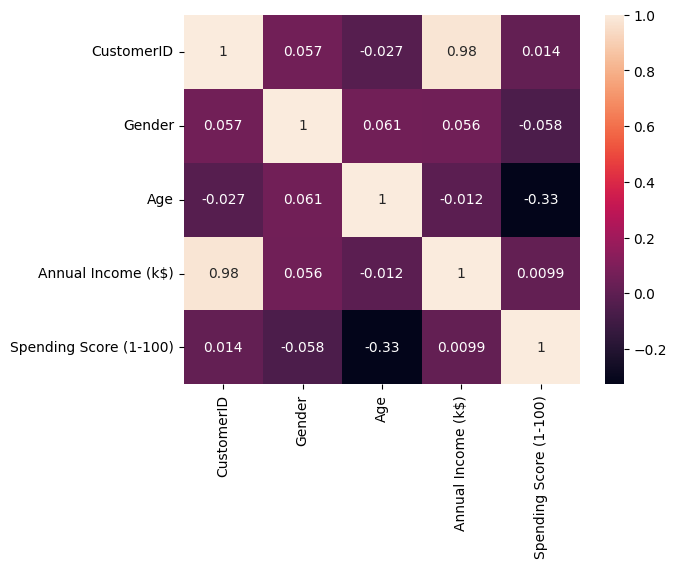

In [ ]:
sns.heatmap(df.corr(),annot=True)

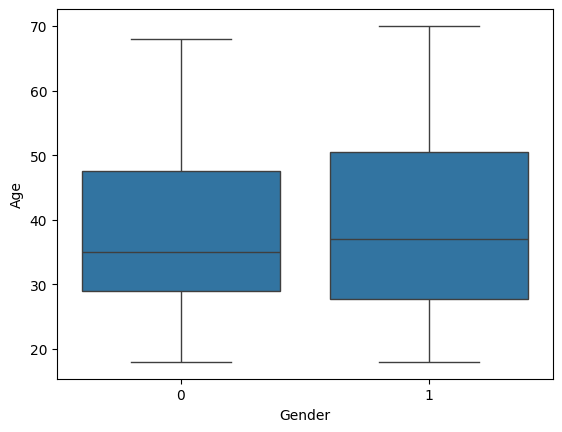

In [ ]:
#outliers  0 = Female , 1= Male
sns.boxplot(x='Gender',y='Age',data=df);

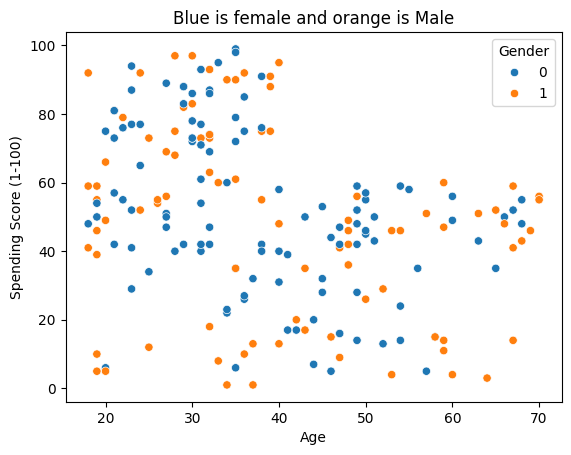

In [ ]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.title("Blue is female and orange is Male")
plt.show()

In [ ]:
Gen =df.groupby('Gender')

In [ ]:
print("\t\t\t0 is female and 1 is male")
Gen.mean()

			0 is female and 1 is male


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,97.562500,38.098214,59.250000,51.526786
1,104.238636,39.806818,62.227273,48.511364


In [ ]:
#max and min
print(Gen.max())
print('\n\n')
print(Gen.min())

        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
0              197   68                 126                      99
1              200   70                 137                      97



        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
0                3   18                  16                       5
1                1   18                  15                       1


# KNN Algorithm

In [ ]:
X= df.iloc[:, [3,4]].values

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

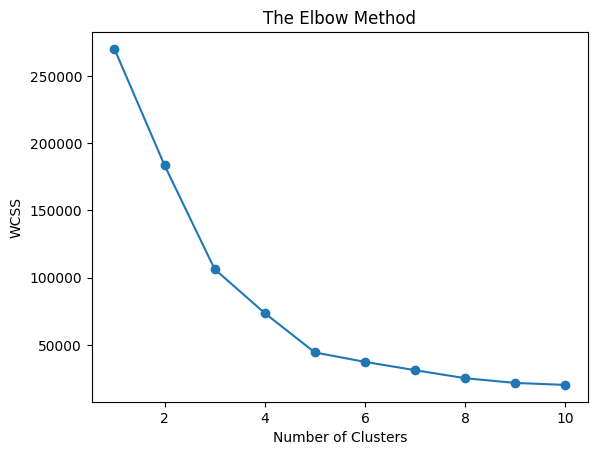

In [ ]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

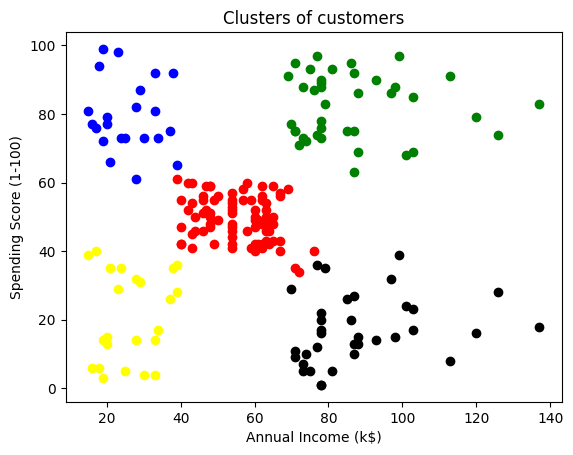

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
model=KMeans(n_clusters=5)
model.fit(df)
pre=model.predict(df)

In [ ]:
df["Target"]=y_means

In [ ]:
df=df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3


In [ ]:
X=df.iloc[:,1:5]
y=df.iloc[:,-1]

In [ ]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
y.head()

,Target
0,3
1,0
2,3
3,0
4,3


In [ ]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

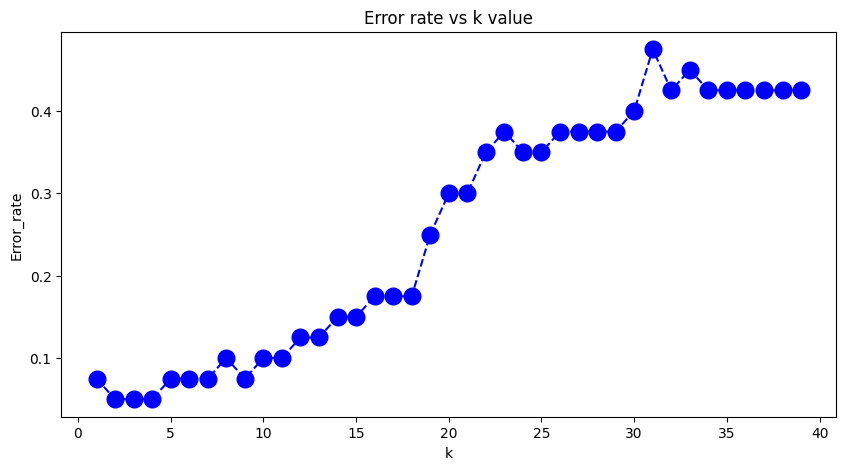

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markersize=12)
plt.title("Error rate vs k value")
plt.xlabel("k")
plt.ylabel("Error_rate")
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluating the KNN model using precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Displaying the precision, recall, and F1-score for KNN
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1-Score: {f1_knn}")

KNN Precision: 0.9410714285714284
KNN Recall: 0.925
KNN F1-Score: 0.9261414141414142


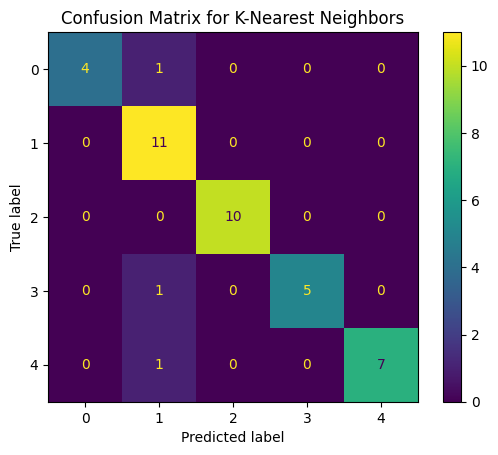

In [ ]:
# Generate predictions using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Dynamically get the unique labels from the test set (y_test)
labels = sorted(set(y_test))

# Display confusion matrix for KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=labels)
disp_knn.plot()
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_model.predict(X_test)

# Evaluating the model using precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Displaying the precision, recall, and F1-score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.8958333333333333
Recall: 0.825
F1-Score: 0.8270418362247447


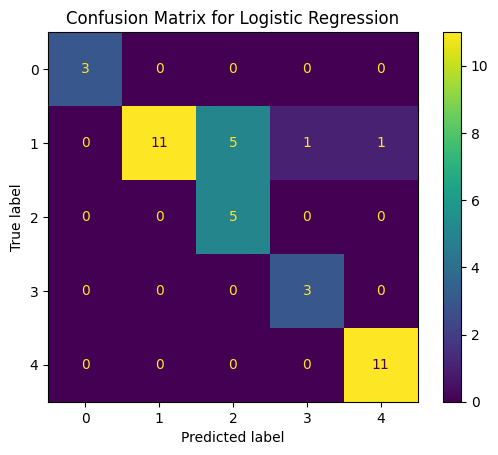

In [ ]:
# Generate the confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Dynamically get the unique labels from the test set
labels = sorted(set(y_test))

# Display the confusion matrix for the Logistic Regression model
disp_log = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=labels)
disp_log.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

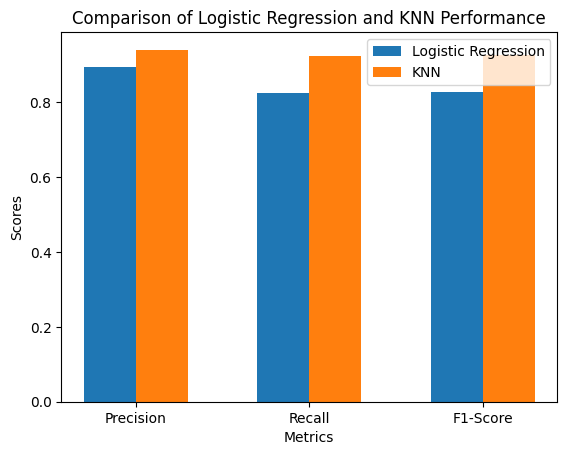

In [ ]:
# Performance metrics for both models
metrics = ['Precision', 'Recall', 'F1-Score']
logistic_scores = [precision, recall, f1]
knn_scores = [precision_knn, recall_knn, f1_knn]

# Create a bar plot to compare the performance of Logistic Regression and KNN
x = range(len(metrics))
width = 0.3

plt.bar(x, logistic_scores, width=width, label='Logistic Regression', align='center')
plt.bar([p + width for p in x], knn_scores, width=width, label='KNN', align='center')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Logistic Regression and KNN Performance')
plt.xticks([p + width/2 for p in x], metrics)
plt.legend()

# Display the plot
plt.show()